<a href="https://colab.research.google.com/github/FatemehAbediK/deep-learning-medical/blob/main/blood_cell_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://www.kaggle.com/datasets/paultimothymooney/blood-cells

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle


In [5]:
blood_cells_dataset=!kaggle datasets download -d paultimothymooney/blood-cells

In [6]:
blood_cells_dataset

['Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells',
 'License(s): other',
 'Downloading blood-cells.zip to /content',
 '',
 '  0% 0.00/108M [00:00<?, ?B/s]',
 '  5% 5.00M/108M [00:00<00:04, 23.5MB/s]',
 ' 16% 17.0M/108M [00:00<00:01, 48.4MB/s]',
 ' 31% 33.0M/108M [00:00<00:01, 58.7MB/s]',
 ' 45% 49.0M/108M [00:00<00:00, 73.6MB/s]',
 ' 60% 65.0M/108M [00:00<00:00, 81.0MB/s]',
 ' 74% 80.0M/108M [00:01<00:00, 97.3MB/s]',
 ' 84% 91.0M/108M [00:01<00:00, 75.8MB/s]',
 '100% 108M/108M [00:01<00:00, 95.3MB/s] ',
 '',
 '100% 108M/108M [00:01<00:00, 79.0MB/s]']

In [7]:
!ls

blood-cells.zip  sample_data


In [8]:
!unzip blood-cells.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: dataset2-mast

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import MinMaxScaler

from pathlib import Path
import os.path
import cv2
import os
import numpy as np


In [10]:
train_dir='/content/dataset2-master/dataset2-master/images/TRAIN'
test_dir='/content/dataset2-master/dataset2-master/images/TEST'

In [11]:
"instead of having them by hand one by one to a numpy arrray we can use : data generator"


"""
dataset_train = []

image_dir = train_dir
for image_name in os.listdir(image_dir):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        img_path = os.path.join(image_dir, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize as needed
            dataset_train.append(np.array(img))

dataset_test = []

image_dir = test_dir
for image_name in os.listdir(image_dir):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        img_path = os.path.join(image_dir, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize as needed
            dataset_test.append(np.array(img))
"""

"\ndataset_train = []\n\nimage_dir = train_dir\nfor image_name in os.listdir(image_dir):\n    if image_name.endswith('.jpg') or image_name.endswith('.png'):\n        img_path = os.path.join(image_dir, image_name)\n        img = cv2.imread(img_path)\n        if img is not None:\n            img = cv2.resize(img, (64, 64))  # Resize as needed\n            dataset_train.append(np.array(img))\n\ndataset_test = []\n\nimage_dir = test_dir\nfor image_name in os.listdir(image_dir):\n    if image_name.endswith('.jpg') or image_name.endswith('.png'):\n        img_path = os.path.join(image_dir, image_name)\n        img = cv2.imread(img_path)\n        if img is not None:\n            img = cv2.resize(img, (64, 64))  # Resize as needed\n            dataset_test.append(np.array(img))\n"

In [12]:
##let's load image data!

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
  preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
  validation_split=0.2)

test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)




In [13]:
##flow the images:

train_images=train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training')


val_images=train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation')

test_images=test_generator.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32 ,
    shuffle=False,
    seed=42)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [14]:
train_images[1]                    #for gettin the labels!!------vectors----so just categorical cross entropy no sparse!!!

(array([[[[-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          ...,
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ]],
 
         [[-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          ...,
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ]],
 
         [[-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          ...,
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ],
          [-1.        , -1.        , -1.        ]],
 
         ...,
 
         [[-

In [15]:
##build pretrained model!!!

pretrained_model=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg')

pretrained_model.trainable=False              #not all the data in mobile net!!!

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
##build classification model!!

inputs = pretrained_model.input
x = pretrained_model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,340,228 (8.93 MB)

 Trainable params: 82,244 (321.27 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [17]:
hist=model.fit(train_images , validation_data=val_images , epochs=10,               #we had the batch size up !! or we can have it here!
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss' , verbose=2 , patience=5 , restore_best_weights=True)])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


249/249 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - accuracy: 0.5347 - loss: 1.0827 - val_accuracy: 0.7521 - val_loss: 0.6097
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8043 - loss: 0.5297 - val_accuracy: 0.8240 - val_loss: 0.4545
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.8417 - loss: 0.4081 - val_accuracy: 0.7893 - val_loss: 0.5185
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.8713 - loss: 0.3393 - val_accuracy: 0.8482 - val_loss: 0.3682
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.8934 - loss: 0.2842 - val_accuracy: 0.8627 - val_loss: 0.3448
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9046 - loss: 0.2651 - val_accuracy: 0.8899 - val_loss: 0.2880
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9192 - loss: 0.2185 - val_accuracy: 0.8738 - val_loss: 0.3167
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9384 - loss: 0.1817 - val_accurac

In [18]:
fig=px.line(hist.history , y=['loss' , 'val_loss']
            , labels={'index' : 'epochs' , 'value' : 'loss'}                   # x , y axis : epochs & loss
            ,title ='training and validation loss')

fig.show();


In [19]:
class_names=list(train_images.class_indices.keys())
print(class_names)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [23]:
y_pred=model.predict(test_images)
y_pred=np.argmax(y_pred, axis=1)

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step


In [24]:
y_pred

array([0, 0, 0, ..., 3, 3, 0])

In [29]:
cm=tf.math.confusion_matrix(test_images.labels , y_pred)
cr=classification_report(test_images.labels , y_pred , target_names=class_names)
acc=accuracy_score(y_pred , test_images.labels)

print('test confusion matrix' , cm)
print('test accuracy score  {:.3f}%' .format(acc * 100))

test confusion matrix tf.Tensor(
[[348  37  13 225]
 [138 271  16 195]
 [187   5 166 262]
 [113  18  15 478]], shape=(4, 4), dtype=int32)
test accuracy score  50.784%


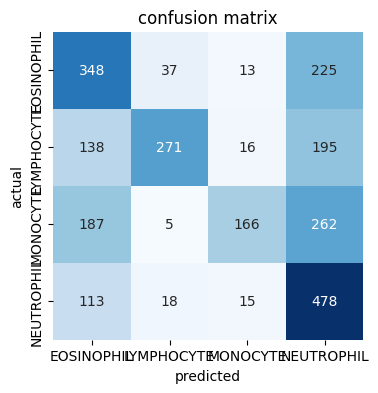

classification report:
 -----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.44      0.56      0.49       623
  LYMPHOCYTE       0.82      0.44      0.57       620
    MONOCYTE       0.79      0.27      0.40       620
  NEUTROPHIL       0.41      0.77      0.54       624

    accuracy                           0.51      2487
   macro avg       0.62      0.51      0.50      2487
weighted avg       0.62      0.51      0.50      2487



In [28]:
plt.figure(figsize=(4,4))
sns.heatmap(cm , annot=True , fmt='g' , vmin=0 , cmap='Blues' , cbar=False)
plt.xticks(np.arange(4) + 0.5 , labels =class_names)
plt.yticks(np.arange(4) + 0.5  , labels =class_names)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show();

print('classification report:\n -----------------------\n' , cr)

test was not good but validation so well

maybe the data in test set was not labeled very well!!!